# Домашнее задание 
# Математика — Домашнее задание 13
# А.&#8201;Д. Егоров

In [1]:
import numpy as np 
from scipy import optimize as opt 
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

# Подгрузим полезные функции
from utils import *

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
%matplotlib inline
# sns.set_palette(palette="Reds")


## Задание $№\,1$

### Условие

Рассмотрим уравнение регрессии следующего вида: 

\begin{equation*}
    y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \varepsilon,
\end{equation*}

где $\beta_1 > 0, \ \beta_2 < 0$ и $cov(x_1, x_2) = 0, \ cov(x_1, x_3) > 0$.

Пусть оно описывает какой-то реально существеющий процесс. Но когда мы сконструировали свою модель, то включили не все переменные, и она выглядела так: 

\begin{equation*}
    y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \nu.
\end{equation*}

Расчитайте знак смещения оценок коэффициентов $\widehat{\beta}_1,\ \widehat{\beta}_2$ для различных знаков коэффициента $\beta_3 \ne 0$ и значений $cov(x_2, x_3)$.

### Решение

Перепишем уравнение с исключенной переменной следующим образом:

\begin{equation*}
    y = \widetilde\beta_0 + \widetilde\beta_1 x_1 + \widetilde\beta_2 x_2 + \nu.
\end{equation*}

Запишем значения для коэффициентов $\widetilde{\beta}_1,\ \widetilde{\beta}_2$ через оценки $\widehat{\beta}_1,\ \widehat{\beta}_2,\ \widehat{\beta}_3$, используя формлулы оценки коэффициентов множественной регрессии:

$$
    \widetilde{\beta}_1 = \widehat{\beta}_1 + \widehat{\beta}_2 \dfrac{cov(x_1, x_2)}{s_{x_1}^2} + \widehat{\beta}_3 \dfrac{cov(x_1, x_3)}{s_{x_1}^2},
$$
$$
    \widetilde{\beta}_2 = \widehat{\beta}_2 + \widehat{\beta}_1 \dfrac{cov(x_1, x_2)}{s_{x_2}^2} + \widehat{\beta}_3 \dfrac{cov(x_2, x_3)}{s_{x_2}^2}.
$$

Накладывая условия поставленной задачи на эти формулы, получим
$$
    \widetilde{\beta}_1 = \widehat{\beta}_1 + \widehat{\beta}_3 \dfrac{cov(x_1, x_3)}{s_{x_1}^2},
$$
$$
    \widetilde{\beta}_2 = \widehat{\beta}_2 + \widehat{\beta}_3 \dfrac{cov(x_2, x_3)}{s_{x_2}^2}.
$$

Условное математическое ожидание:
$$
    E\left[ \widetilde{\beta}_1 | x_1 \right] = {\beta}_1 + {\beta}_3 \dfrac{cov(x_1, x_3)}{s_{x_1}^2},
$$
$$
    E\left[ \widetilde{\beta}_2 | x_2 \right] = {\beta}_2 + {\beta}_3 \dfrac{cov(x_2, x_3)}{s_{x_2}^2}.
$$

С учетом полученных формул расчитаем знак смещения оценок исходной задачи при заданных параметрах:

| For $\widehat{\beta}_1$ | $cov(x_1, x_3) > 0$ |
|-------------------------|---------------------|
| $\beta_3 > 0$           | Positive bias       |
| $\beta_3 < 0$           | Negative bias       |

| For $\widehat{\beta}_2$ | $cov(x_2, x_3) = 0$ | $cov(x_2, x_3) > 0$ | $cov(x_2, x_3) < 0$ |
|-------------------------|---------------------|---------------------|---------------------|
| $\beta_3 > 0$           | Zero bias           | Positive bias       | Negative bias       |
| $\beta_3 < 0$           | Zero bias           | Negative bias       | Positive bias       |

## Задание $№\,2$

### Условие
Сгенерируйте датасет со случайными нормально распределенными величинами
$$
    x_1 \sim N\left( \mu_1, \sigma_1^2 \right), 
    \quad 
    x_2 \sim N\left( \mu_2, \sigma_2^2 \right),
    \quad
    corr(x_1, x_2) = -0.7, 
$$
размер выборки $N = 1000$.

Сгенерируйте зависимую переменную $y$ по формуле
$$
    y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \varepsilon,
$$
где $\varepsilon \sim N\left(0, \sigma_\varepsilon^2\right), \ \beta_i \ne 0, \ i = 0, 1, 2.$

Требуется: 

1. Оценить модель с помощью МНК, вывести репорт с результатами модели, дать трактовку полученным оценкам коэффициентов модели $\widehat\beta_1, \widehat\beta_2$, провести тесты на нормальность распределения остатков и дать свои комментарии.
2. Отрисовать графики: 
    1. $y\ vs\ x_1$, $y\ vs\ x_2$, $y\ vs\ \widehat y$, распределение остатков модели. Дать свои комментарии
    2. Провести симуляцию изменения результатов модули в зависимости от размера выборки $N$ (через цикл или параллельные вычисления) для $N = 30 \dots 1000$, сохраняя оценки и стандартные ошибки коэффициентов $\widehat\beta_1,\ \widehat\beta_2$.
    3. Отрисовать графики зависимости оценок коэффициентов $\widehat\beta_1,\ \widehat\beta_2$ от $N$. Добавить на этих графиках верхнюю и нижнюю границу двухстороннего доверительного итервала оценок $\widehat\beta_1,\ \widehat\beta_2$ при $\alpha = 5\,\%$. Дать комментарии по результатам.

### Решение

### Пункт 1

In [2]:
# Определим параметры выборки для задачи пропущенной переменной
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 10.0,
    x1_std = 10.0,
    x2_mean = 20.0,
    x2_std = 12.0,
    corr_12 = -0.7,
    
    # Зададим параметры распределения ошибки
    e_mean = 0.0,
    e_std = 8.0,

    # Укажем размер выборки
    N = 1000,

    # Зададим действительные параметры модели
    beta0 = 33.0,
    beta1 = 7.0,
    beta2 = -5.0,
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

,x1,x2,e,y
0,4.965136,25.181388,-5.401426,-63.552416
1,11.431040,32.927931,-1.156149,-52.778524
2,10.968322,16.472952,-6.339359,21.074135
3,-0.341079,40.846716,-2.463692,-176.084829
4,16.692315,16.595128,-15.148917,51.721648
...,...,...,...,...
995,6.473733,31.889655,0.619844,-80.512301
996,2.827515,36.167476,2.062020,-125.982755
997,11.920677,27.898038,-9.934085,-32.979536
998,6.094211,16.501280,2.673411,-4.173513


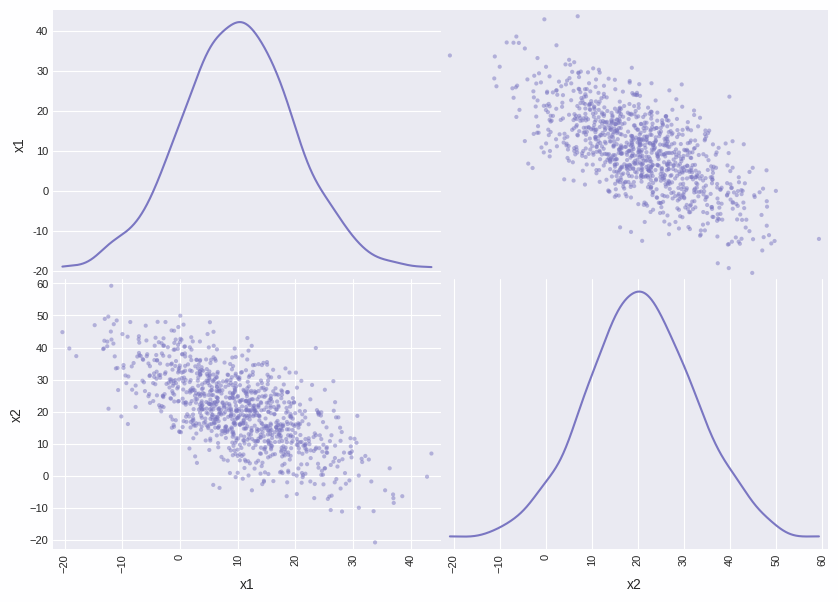

In [3]:
# Сгенерируем датасет

# DONE:
# Дописана новая функции на основе функции gen_data из utils
# для генерации данных с двумя переменными
dt_var = gen_data_2(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)

display(dt_var)

# Посмотрим на корреляции глазами
pd.plotting.scatter_matrix(dt_var[["x1", "x2"]], figsize = (10,7), diagonal = 'kde');

#### Обучение модели
Строим линейную модель, чтобы найти взаимосвязь между нашими факторами x1, x2 и таргетом y:

In [4]:
# Обучим модель и выведем результаты
dt_var, model_vars = train_model(dt_var, target='y', feature_names=['x1', 'x2'], show_results=False, return_norm_tests=False)

### Пункт 2.1

In [5]:
print(model_vars.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.070e+05
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:23:36   Log-Likelihood:                -3480.7
No. Observations:                1000   AIC:                             6967.
Df Residuals:                     997   BIC:                             6982.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4161      0.901     35.968      0.0

In [6]:
display(norm_distr_check(
            (dt_var['residuals'] - np.mean(dt_var['residuals']))\
                /np.std(dt_var['residuals'])
            ))

FileNotFoundError: [Errno 2] No such file or directory: 'table/Epps_Pulley_test_table.csv'

Оценки коэффициентов $\widetilde\beta_1, \ \widetilde\beta_2$, можно сказать, совпадают с реально введенными коэффициентами:
- отличаются меньше чем на 0.1, 
- истинные значения коэффициентов попадают в доверительный интревал.

Тесты на нормальность остатков модель так же прошла. 

Можно сделать вывод, что модель описывает данные с высокой точностью.

/home/san/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/san/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


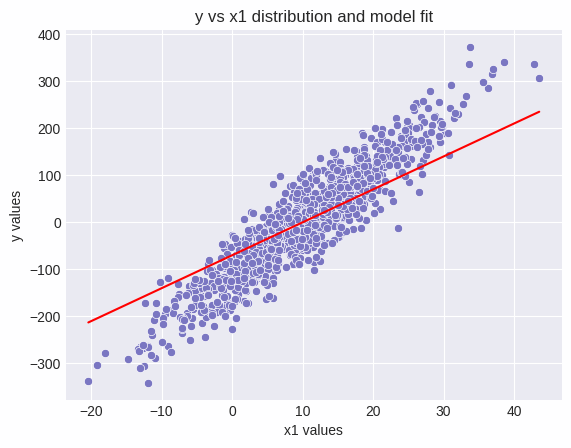

/home/san/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/san/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


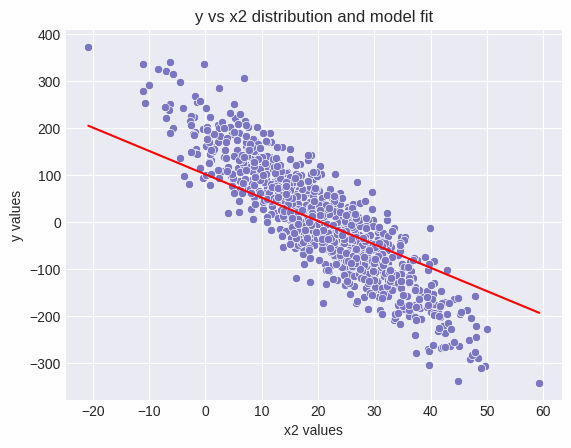

/home/san/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/san/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


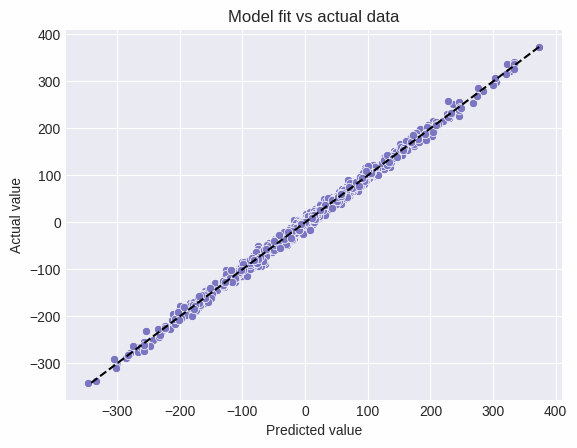

/home/san/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


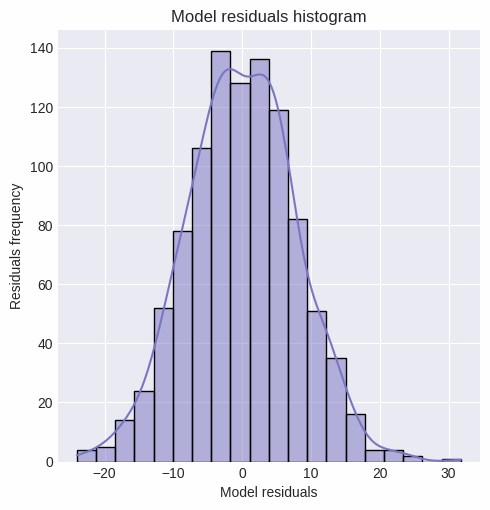

In [ ]:
plot_data(dt_var, target="y", feature_names=['x1', 'x2'], plot_type='model', pairwise=False, model=model_vars)


По построеннным графикам можно сделать выводы:
- $\beta_1$ положительный коэффициент, $\beta_2$ отрицательный коэффициент, 
- функция распредления остатков похожа на функцию нормального распределения,
- модель достаточно точно отражает данные.

### Пункт 2.2

Погоняем тесты и заполняем массивы с данными для графиков:

In [ ]:
beta_1 = {
    "beta": [],
    "lower_conf": [],
    "upper_conf": [], 
}
beta_2 = {
    "beta": [],
    "lower_conf": [],
    "upper_conf": [],
}

for i in range(30, 1001):

    dist_params["N"] = i
    dt_var = gen_data_2(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)
    _, model_vars = train_model(dt_var, target='y', feature_names=['x1', 'x2'], show_results=False, return_norm_tests=False)
    
    
    beta_1["beta"].append(model_vars.params.x1)
    beta_1["lower_conf"].append(model_vars.conf_int(alpha=0.05).iloc[1, 0])
    beta_1["upper_conf"].append(model_vars.conf_int(alpha=0.05).iloc[1, 1])

    beta_2["beta"].append(model_vars.params.x2)
    beta_2["lower_conf"].append(model_vars.conf_int(alpha=0.05).iloc[2, 0])
    beta_2["upper_conf"].append(model_vars.conf_int(alpha=0.05).iloc[2, 1])

### Пункт 2.3

Построим графики:

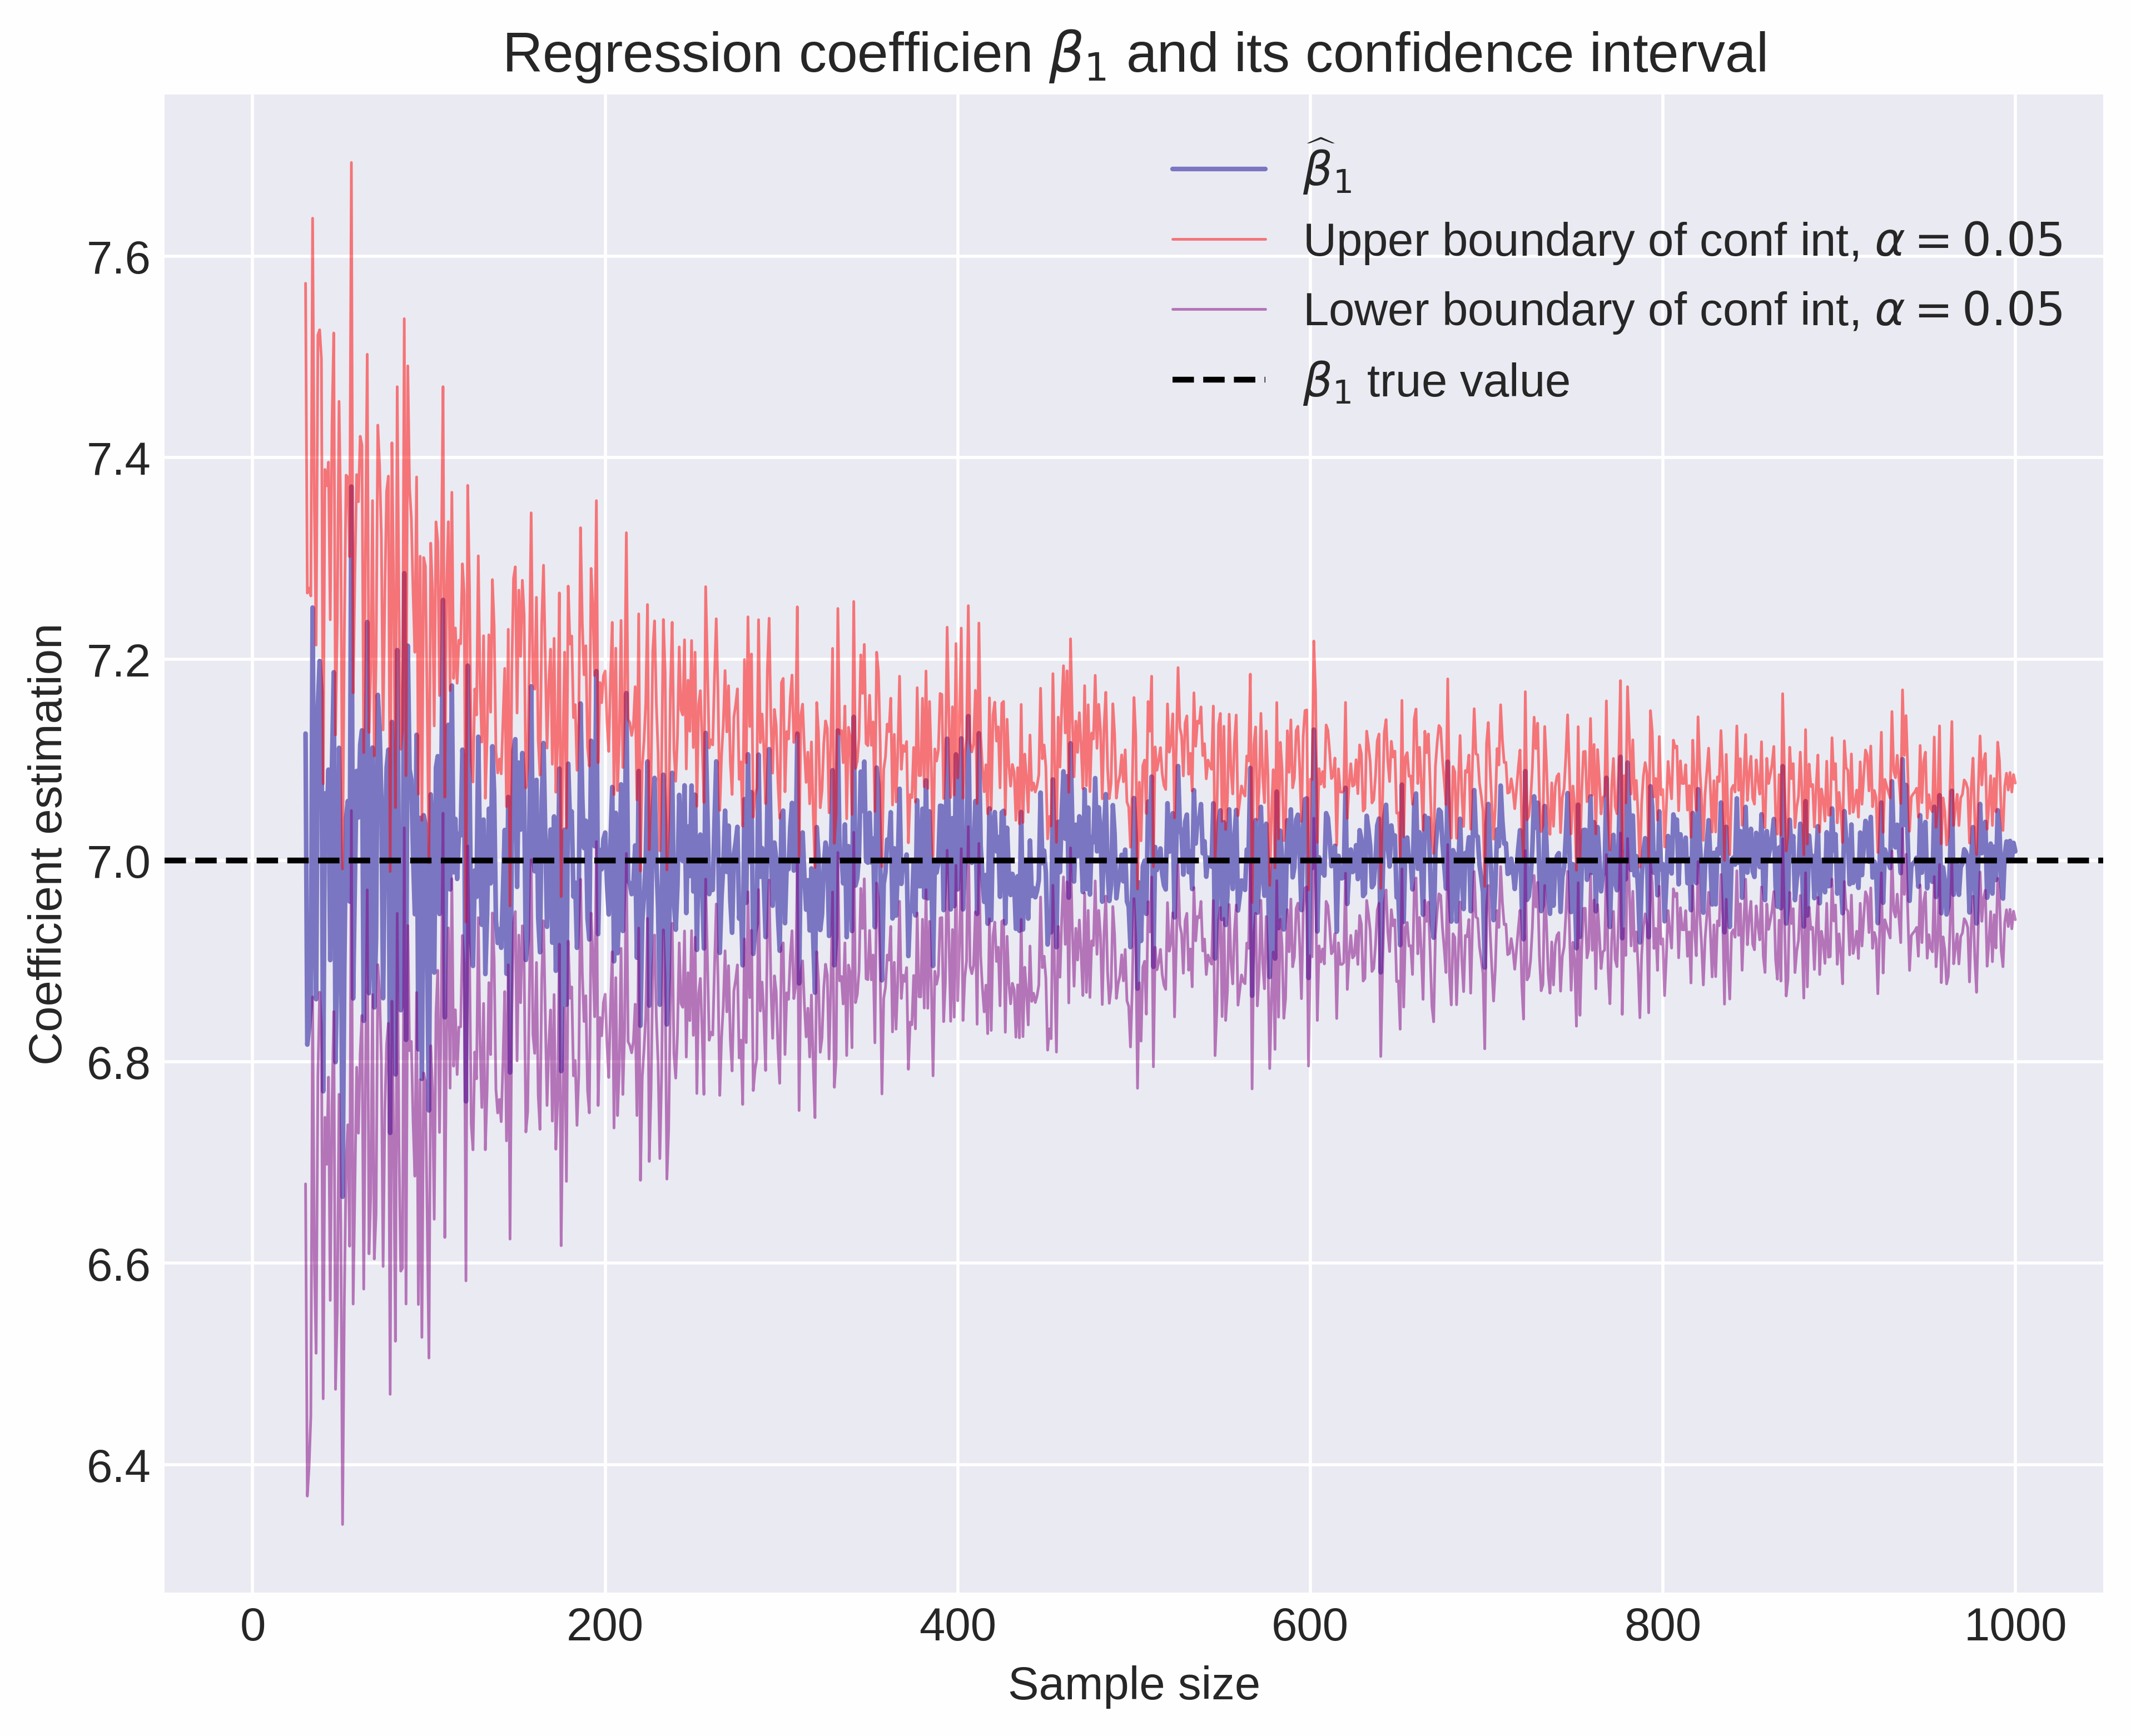

In [ ]:
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 12

X = list(range(30, 1001))
fig = plt.figure(figsize=(9, 7))

plt.title(label="Regression coefficien $\\beta_1$ and its confidence interval")

plt.plot(X, beta_1["beta"], linewidth=1.2, label="$\\widehat\\beta_1$")
plt.plot(X, beta_1["upper_conf"], color="r", linewidth=0.7, alpha=0.5, label="Upper boundary of conf int, $\\alpha=0.05$")
plt.plot(X, beta_1["lower_conf"], color="purple", linewidth=0.7, alpha=0.5, label="Lower boundary of conf int, $\\alpha=0.05$")
plt.hlines(7.0, -50, 1050, linestyles="--", colors="black", label="$\\beta_1$ true value")

plt.xlim((-50, 1050))
plt.xlabel("Sample size")
plt.ylabel("Coefficient estimation")
plt.legend()

plt.show()


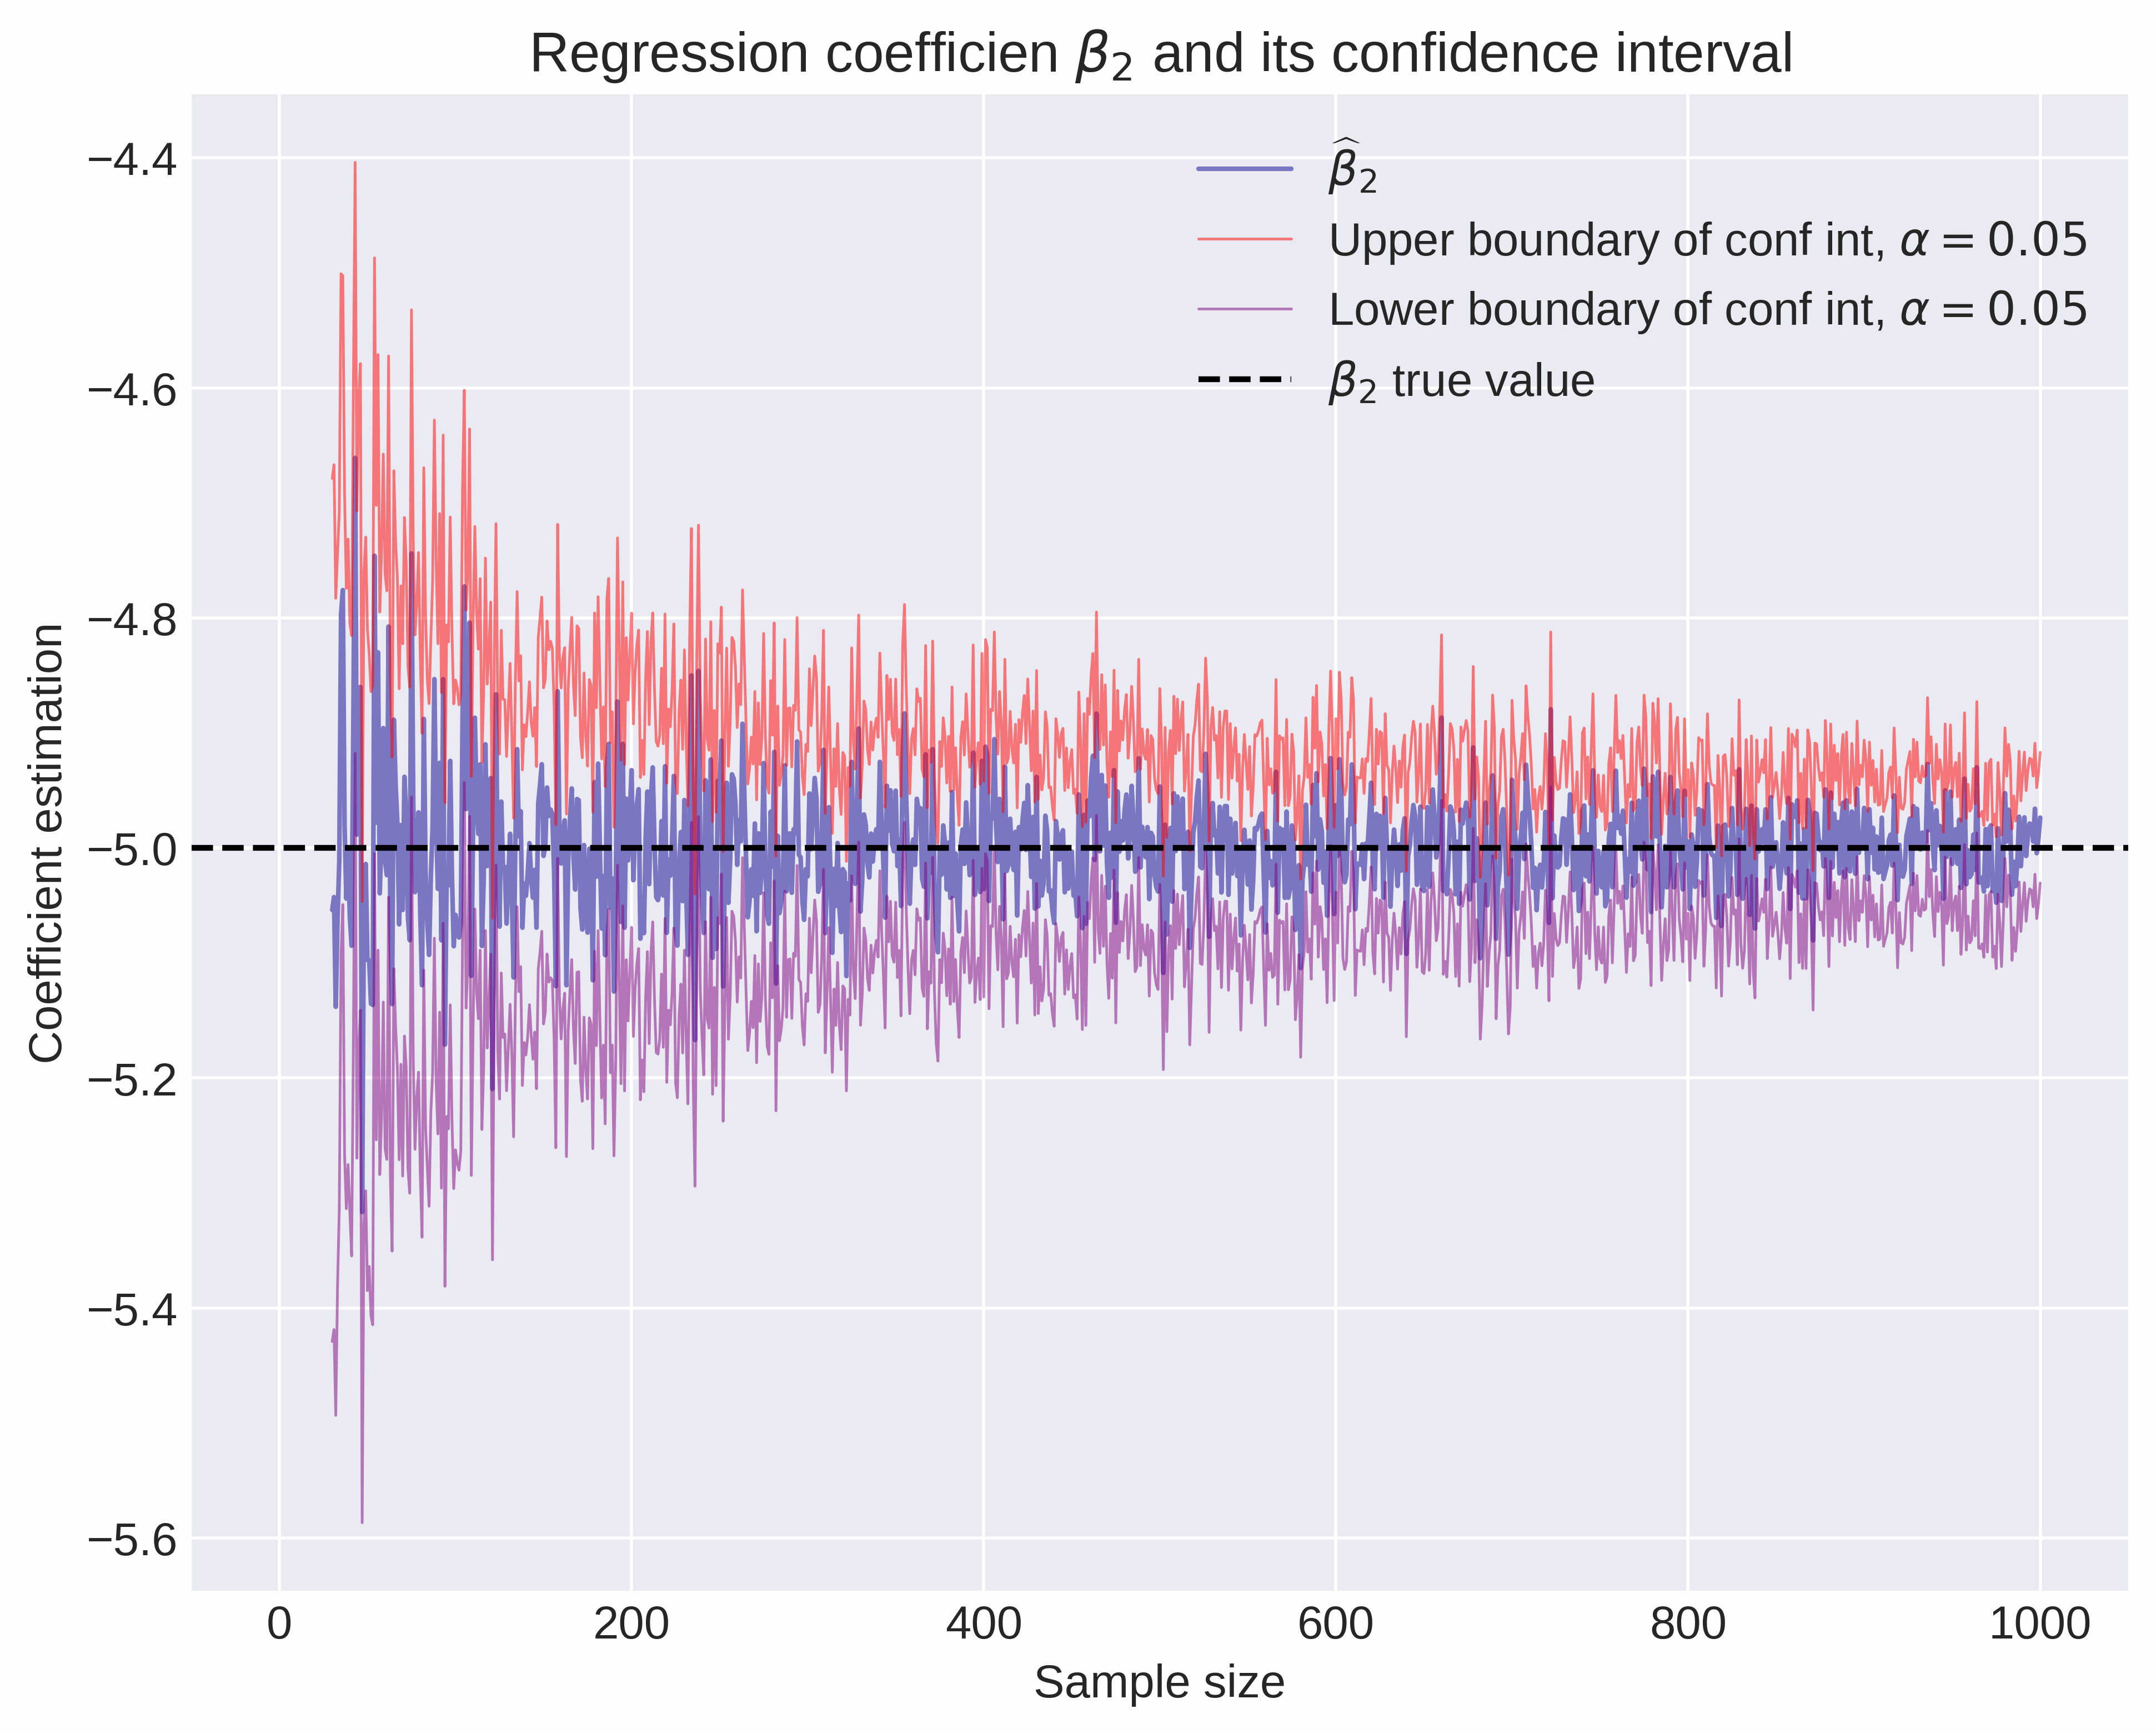

In [ ]:
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 12

X = list(range(30, 1001))
fig = plt.figure(figsize=(9, 7))

plt.title(label="Regression coefficien $\\beta_2$ and its confidence interval")

plt.plot(X, beta_2["beta"], linewidth=1.2, label="$\\widehat\\beta_2$")
plt.plot(X, beta_2["upper_conf"], color="r", linewidth=0.7, alpha=0.5, label="Upper boundary of conf int, $\\alpha=0.05$")
plt.plot(X, beta_2["lower_conf"], color="purple", linewidth=0.7, alpha=0.5, label="Lower boundary of conf int, $\\alpha=0.05$")
plt.hlines(-5.0, -50, 1050, linestyles="--", colors="black", label="$\\beta_2$ true value")

plt.xlim((-50, 1050))
plt.xlabel("Sample size")
plt.ylabel("Coefficient estimation")
plt.legend()

plt.show()

При увеличении объема выборки значения оценок $\widehat\beta_1, \ \widehat\beta_2$ стремятся к истиным значениям параметров регрессии.